In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [7]:
df = pd.read_csv('/content/drive/MyDrive/spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [12]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [14]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [16]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [17]:
inputs = Input(shape=[max_len])
layer = Embedding(max_words,50,input_length=max_len)(inputs)
layer = LSTM(128)(layer)
layer = Dense(128)(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1)(layer)
layer = Activation('sigmoid')(layer)
model = Model(inputs=inputs,outputs=layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 128)               91648     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129   

In [18]:
model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [19]:
history = model.fit(sequences_matrix,Y_train,batch_size=0,epochs=10,
          validation_split=0.2)

Epoch 1/10
112/112 [==============================] - 26s 213ms/step - loss: 0.2325 - accuracy: 0.9262 - val_loss: 0.0626 - val_accuracy: 0.9798
Epoch 2/10
112/112 [==============================] - 23s 208ms/step - loss: 0.0446 - accuracy: 0.9857 - val_loss: 0.0524 - val_accuracy: 0.9843
Epoch 3/10
112/112 [==============================] - 25s 223ms/step - loss: 0.0250 - accuracy: 0.9933 - val_loss: 0.0603 - val_accuracy: 0.9821
Epoch 4/10
112/112 [==============================] - 23s 208ms/step - loss: 0.0132 - accuracy: 0.9969 - val_loss: 0.0684 - val_accuracy: 0.9832
Epoch 5/10
112/112 [==============================] - 24s 210ms/step - loss: 0.0092 - accuracy: 0.9983 - val_loss: 0.0795 - val_accuracy: 0.9821
Epoch 6/10
112/112 [==============================] - 23s 209ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.0826 - val_accuracy: 0.9843
Epoch 7/10
112/112 [==============================] - 25s 226ms/step - loss: 0.0128 - accuracy: 0.9964 - val_loss: 0.0743 - val_ac

In [20]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

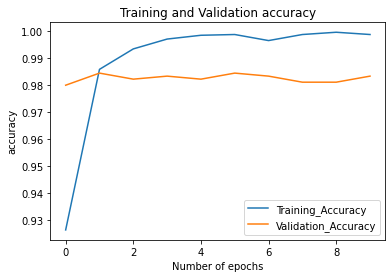

In [21]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [22]:
model.save('Spam_sms_classifier.h5')

In [23]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [24]:
accuracy1 = model.evaluate(test_sequences_matrix,Y_test)

35/35 [==============================] - 2s 69ms/step - loss: 0.0821 - accuracy: 0.9857


In [25]:
print(' Accuracy: {:0.3f}'.format(accuracy1[0],accuracy1[1]))

 Accuracy: 0.082
